### Load Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Real World Examples
#### Download data from github link

### Line Graph

0     1990
3     1993
6     1996
9     1999
12    2002
15    2005
18    2008
Name: Year, dtype: int64


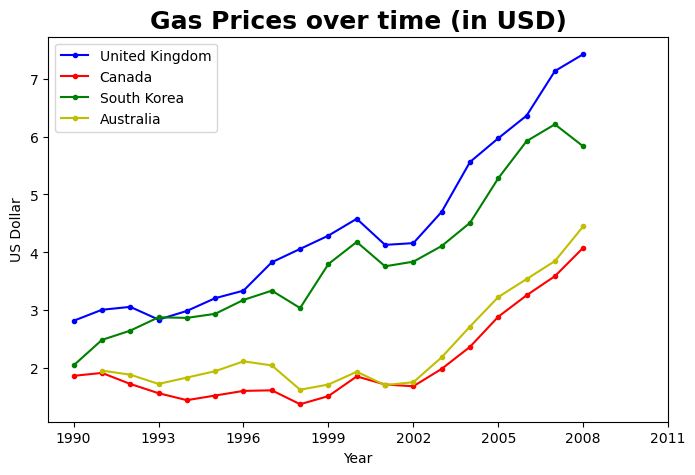

In [128]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))
plt.title('Gas Prices over time (in USD)', fontdict={'fontweight': 'bold', 'fontsize': 18})


plt.plot(gas.Year, gas.UK, 'b.-', label='United Kingdom')
plt.plot(gas['Year'], gas.Canada, 'r.-', label='Canada')
plt.plot(gas['Year'], gas['South Korea'], 'g.-', label='South Korea')
plt.plot(gas.Year, gas.Australia, 'y.-', label='Australia')
# country_labels = {
#     'Australia': 'Australia',
#     'Canada': 'Canada',
#     'France': 'France',
#     'Germany': 'Germany',
#     'Italy': 'Italy',
#     'Japan': 'Japan',
#     'Mexico': 'Mexico',
#     'South Korea': 'South Korea',
#     'UK': 'UK',
#     'USA': 'USA'
# }


# Another Way to Plot many values!
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas.columns:
#     if country in countries_to_look_at:
#         label = country_labels.get(country, country)
#         plt.plot(gas.Year, gas[country], marker='.', label=label)

print(gas.Year[::3])

plt.xticks(gas.Year[::3].tolist()+[2011])
plt.xlabel('Year')
plt.ylabel('US Dollar')
plt.legend()
plt.savefig('Gas_price_figure.png', dpi=300)

plt.show()

### Load Fifa Data

In [135]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histogram

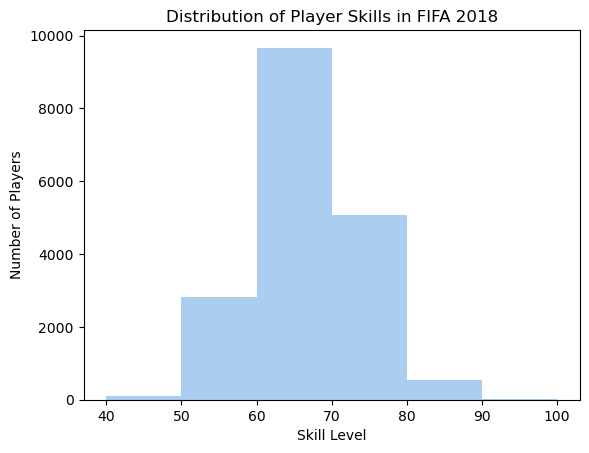

In [166]:
bins = [40,50,60,70,80,90,100]
plt.hist(fifa.Overall, bins=bins, color="#abcdef")
plt.xticks(bins)
plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')
plt.show()

### Pie Charts

C:\Users\Pyae Phyo Linn\AppData\Local\Temp\ipykernel_2184\2649441854.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
C:\Users\Pyae Phyo Linn\AppData\Local\Temp\ipykernel_2184\2649441854.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]


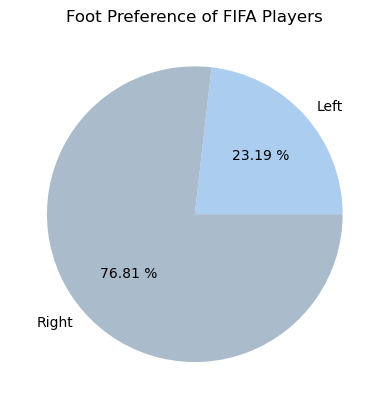

In [216]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']
plt.pie([left, right], labels = labels, colors=colors, autopct='%.2f %%')
plt.title('Foot Preference of FIFA Players')
plt.show()

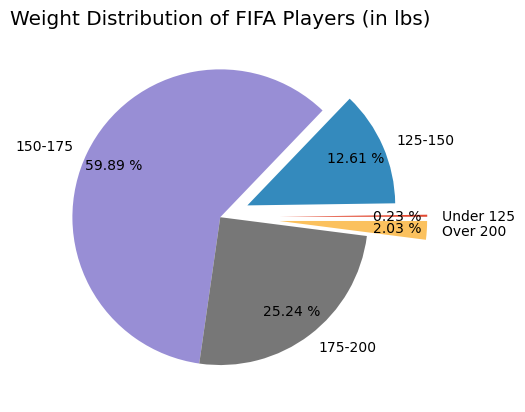

In [282]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

plt.style.use('ggplot')

light = fifa.loc[fifa.Weight < 125].count().iloc[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count().iloc[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count().iloc[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count().iloc[0]
heavy = fifa[fifa.Weight >= 200].count().iloc[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = (.4, .2, 0, 0, .4)

plt.title('Weight Distribution of FIFA Players (in lbs)')
plt.pie(weights, labels=labels, autopct="%.2f %%", pctdistance=0.8, explode=explode)
plt.show()

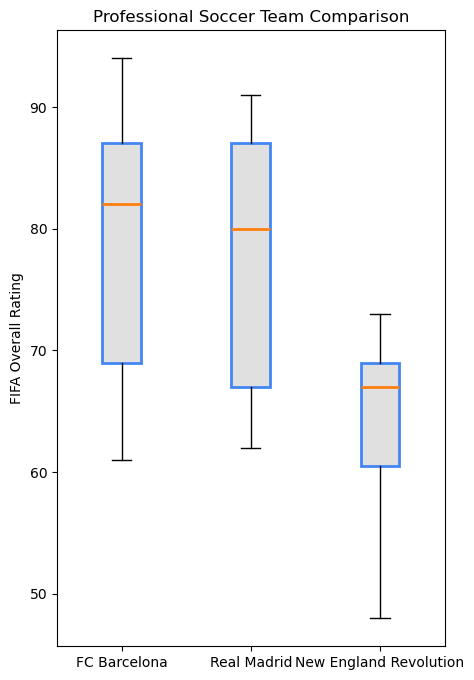

In [334]:
plt.style.use('default')

plt.figure(figsize=(5,8))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']
boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True, medianprops={'linewidth':2})


for box in boxes['boxes']:
    # Set edge color
    box.set(color='#4286f4', linewidth=2)

    # Change Fill color
    box.set(facecolor='#e0e0e0')
    
plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')
plt.show()